In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1 Data Cleansing

In [15]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Tidak ada missing value

In [17]:
#check for duplicated rows
duplicates = data.duplicated().sum()
print("Duplicated Rows:\n", duplicates)

Duplicated Rows:
 0


### 2 EDA

In [26]:
# group column names based on type
numericals = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [27]:
#Statistical summary of columns
data[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


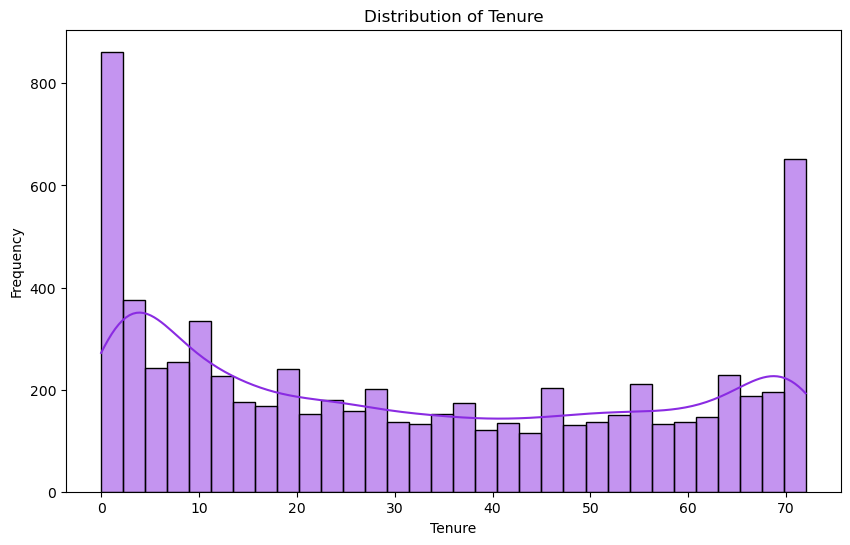

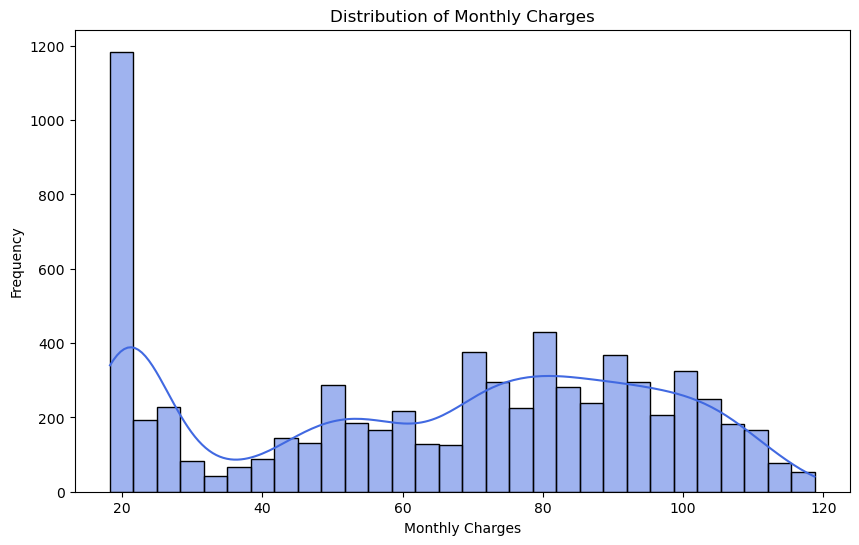

In [28]:
# Distribution of 'tenure'
plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], bins=32, kde=True, color='blueviolet')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'MonthlyCharges'
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

/var/folders/4r/brqny5gd2m13wffdr215lx6m0000gn/T/ipykernel_2607/1280064376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


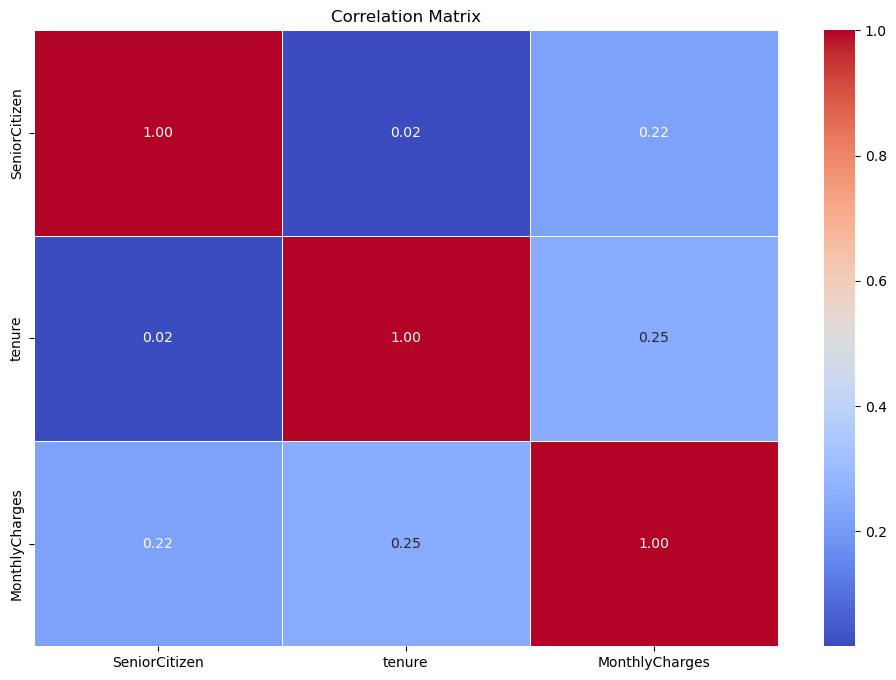

In [29]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

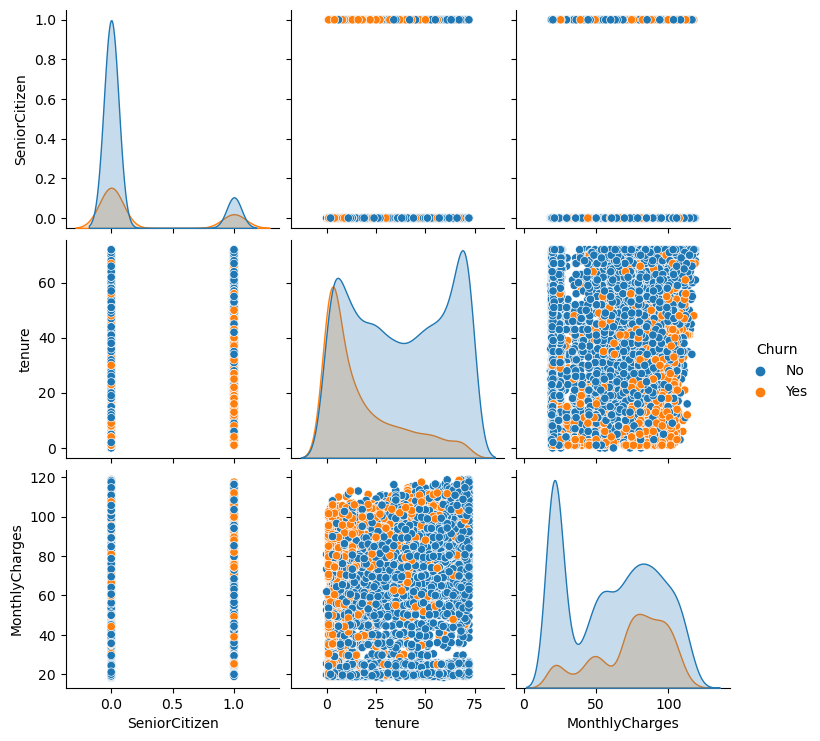

In [32]:
#pairplot of the data
sns.pairplot(data, hue='Churn')

### 3 Deep-dive exploration

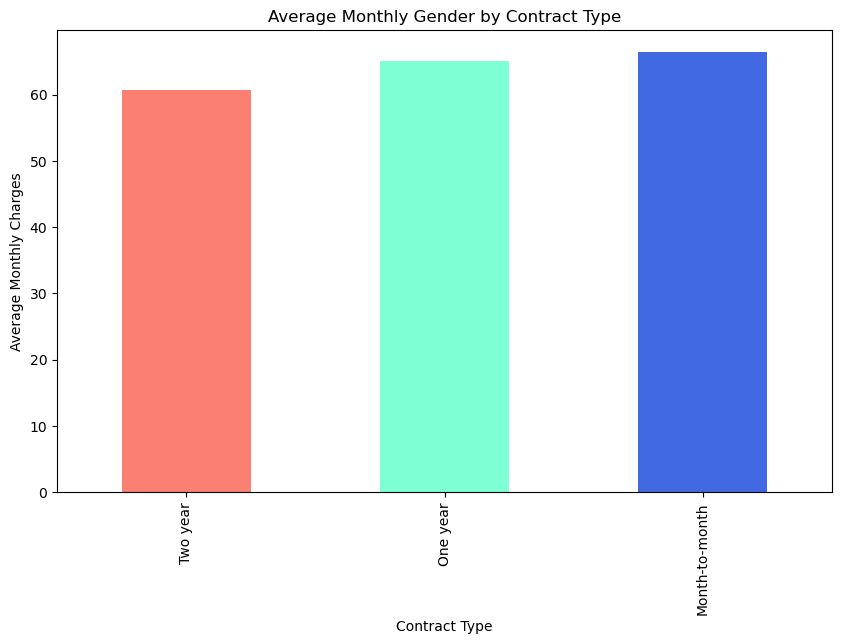

In [39]:
#1. What is the average Monthly Charges for different Contract types?

# Group by 'Contract' and calculate the average Monthly Charges
average_monthly_charges_by_contract = data.groupby('Contract')['MonthlyCharges'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
average_monthly_charges_by_contract.plot(kind='bar', color=['salmon','aquamarine','royalblue'])
plt.title('Average Monthly Gender by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.show()


Interpretation: This analysis provides insights into how average Monthly Charges vary across different Contract types. It can help understand the pricing structure and preferences of customers.

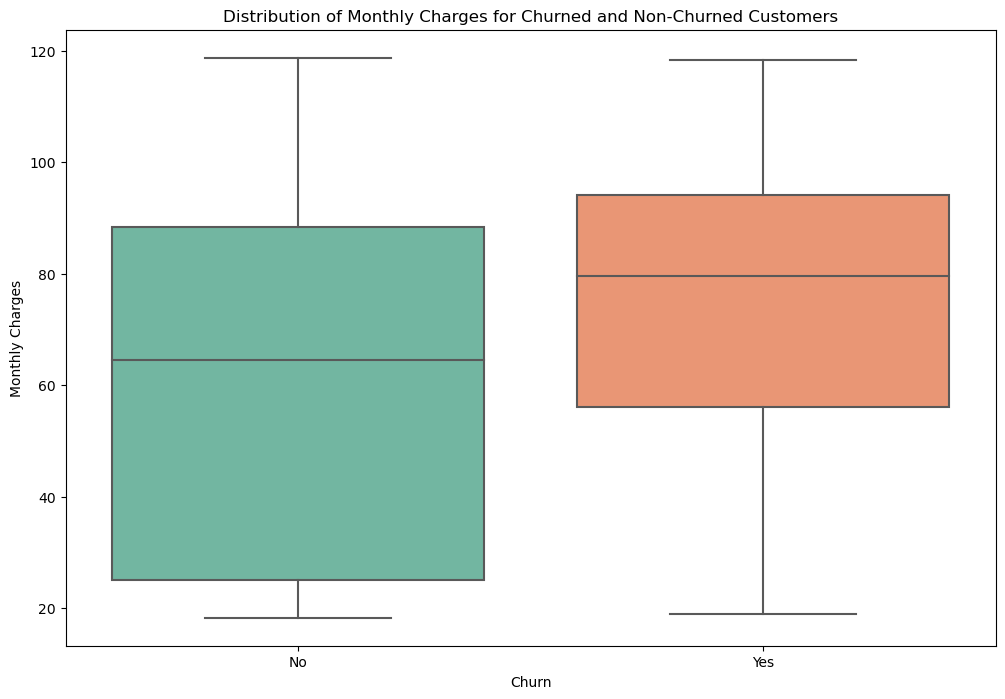

In [40]:
#2. How does the distribution of Monthly Charges differ between customers who churned and those who didn't?

# Boxplot to compare the distribution of Monthly Charges for 'Churn' categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Distribution of Monthly Charges for Churned and Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


Interpretation: there is significant differences in pricing that might influence customer retentionHW